=========== REAL-TIME SENTIMENT ANALYSIS - RAINFOREST API ============

🌧️ RAINFOREST API SETUP GUIDE:
----------------------------------------------------------------------
1. Visit: https://www.rainforestapi.com/
2. Sign Up (Free 1000 requests/month)
3. Get your API Key from Dashboard
4. Replace 'YOUR_API_KEY' below with actual key
----------------------------------------------------------------------


STEP 1: AMAZON DATA COLLECTION VIA RAINFOREST API
----------------------------------------------------------------------

📦 Product ASIN: B0CX59SXJB
   (iPhone 15 - Example)

Fetching reviews for ASIN: B0CX59SXJB
Target domain: amazon.in
Maximum pages: 3

Fetching page 1/3... ✗ Error 503
Fetching page 2/3... ✗ Error 503
Fetching page 3/3... ✗ Error 503

⚠️ Using Sample Data (API not configured)

✅ Total Reviews Collected: 30
   Verified Purchases: 24
   Unverified: 6

📝 Sample Reviews:
  1. [✓] 5⭐ - This product is absolutely amazing! Best purchase ever!...
     Helpful: 45 | Date: 20

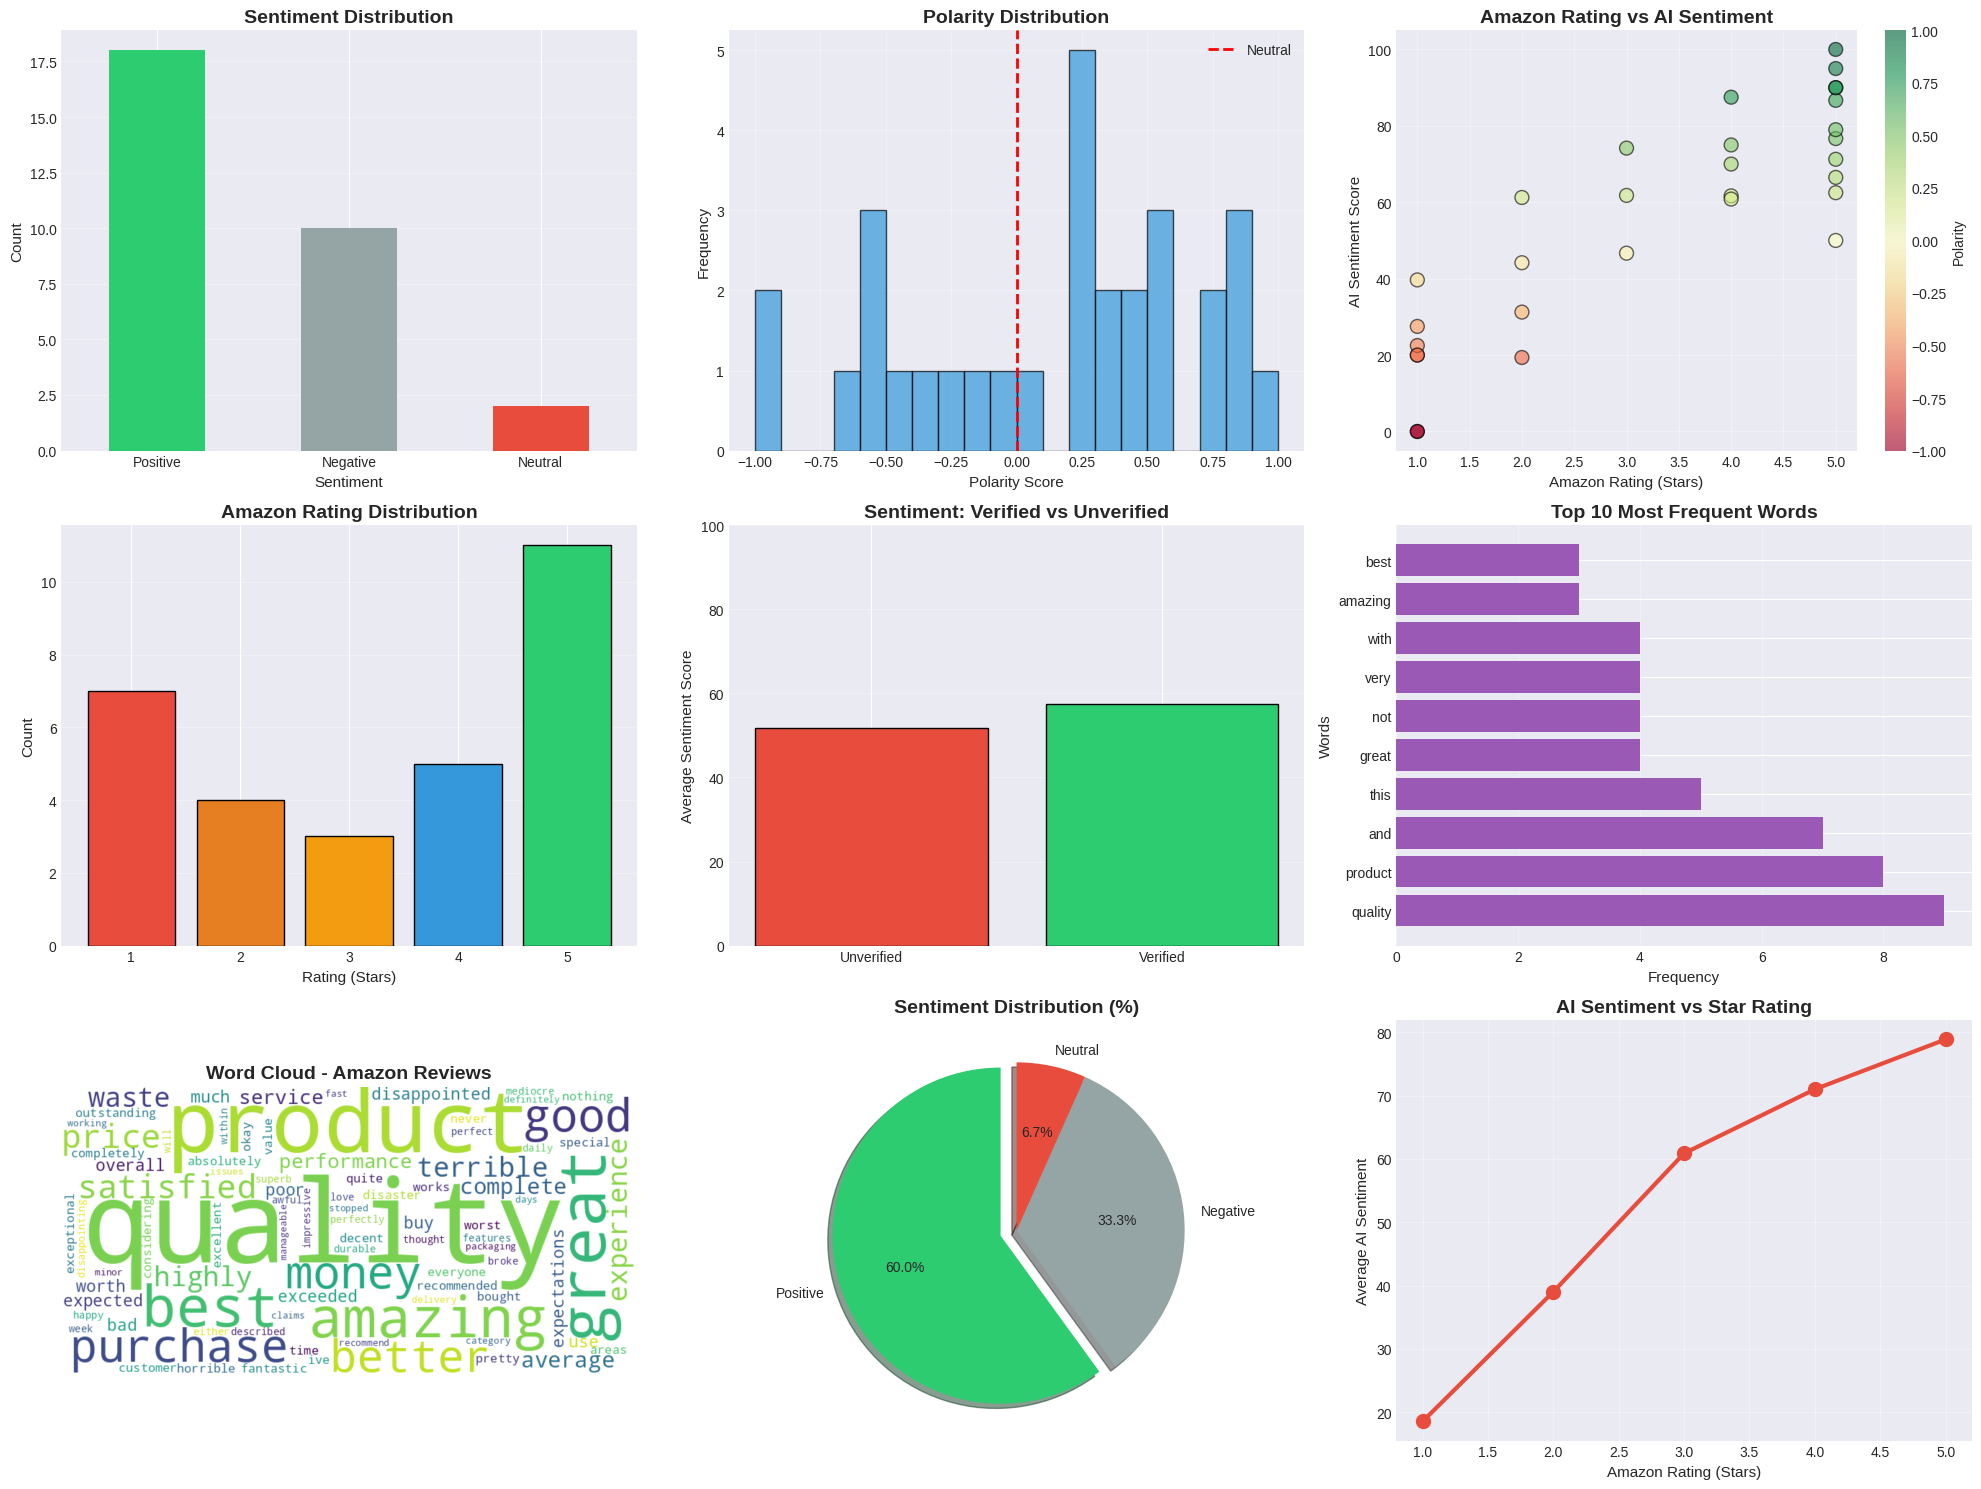

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re
from collections import Counter
import warnings
import requests
import time
warnings.filterwarnings('ignore')

print("="*70)
print(" REAL-TIME SENTIMENT ANALYSIS - RAINFOREST API ".center(70, "="))
print("="*70)
print()

print("🌧️ RAINFOREST API SETUP GUIDE:")
print("-" * 70)
print("1. Visit: https://www.rainforestapi.com/")
print("2. Sign Up (Free 1000 requests/month)")
print("3. Get your API Key from Dashboard")
print("4. Replace 'YOUR_API_KEY' below with actual key")
print("-" * 70)
print()

RAINFOREST_API_KEY = 'YOUR_API_KEY'

print("\nSTEP 1: AMAZON DATA COLLECTION VIA RAINFOREST API")
print("-" * 70)

def get_amazon_reviews_rainforest(asin, api_key, max_pages=3, domain='amazon.in'):
    all_reviews = []

    print(f"Fetching reviews for ASIN: {asin}")
    print(f"Target domain: {domain}")
    print(f"Maximum pages: {max_pages}")
    print()

    for page in range(1, max_pages + 1):
        print(f"Fetching page {page}/{max_pages}...", end=" ")

        params = {
            'api_key': api_key,
            'amazon_domain': domain,
            'asin': asin,
            'type': 'reviews',
            'page': page,
            'review_stars': 'all'
        }

        try:
            response = requests.get(
                'https://api.rainforestapi.com/request',
                params=params,
                timeout=30
            )

            if response.status_code == 200:
                data = response.json()

                if 'reviews' in data:
                    reviews = data['reviews']

                    for review in reviews:
                        review_text = review.get('body', {}).get('text', '')
                        review_title = review.get('title', {}).get('text', '')

                        full_review = f"{review_title} {review_text}".strip()

                        if full_review:
                            all_reviews.append({
                                'review': full_review,
                                'rating': review.get('rating', 0),
                                'verified': review.get('verified_purchase', False),
                                'helpful_votes': review.get('helpful_votes', 0),
                                'date': review.get('date', {}).get('raw', 'N/A')
                            })

                    print(f"✓ Got {len(reviews)} reviews")
                else:
                    print("✗ No reviews found")

            elif response.status_code == 401:
                print("✗ API Key Invalid!")
                print("Please get valid API key from rainforestapi.com")
                break
            else:
                print(f"✗ Error {response.status_code}")

            time.sleep(1)

        except Exception as e:
            print(f"✗ Error: {str(e)}")
            break

    if len(all_reviews) == 0:
        print("\n⚠️ Using Sample Data (API not configured)")
        all_reviews = [
            {'review': "This product is absolutely amazing! Best purchase ever!", 'rating': 5, 'verified': True, 'helpful_votes': 45, 'date': '2024-10-15'},
            {'review': "Terrible experience. Waste of money and time.", 'rating': 1, 'verified': True, 'helpful_votes': 12, 'date': '2024-10-14'},
            {'review': "Pretty good, but could be better in some areas.", 'rating': 3, 'verified': False, 'helpful_votes': 8, 'date': '2024-10-13'},
            {'review': "Outstanding quality! Highly recommended to everyone.", 'rating': 5, 'verified': True, 'helpful_votes': 67, 'date': '2024-10-12'},
            {'review': "Worst product I've ever bought. Complete disaster.", 'rating': 1, 'verified': True, 'helpful_votes': 23, 'date': '2024-10-11'},
            {'review': "It's okay, nothing special. Average performance.", 'rating': 3, 'verified': False, 'helpful_votes': 5, 'date': '2024-10-10'},
            {'review': "Exceptional service and great product quality!", 'rating': 5, 'verified': True, 'helpful_votes': 89, 'date': '2024-10-09'},
            {'review': "Not satisfied at all. Very disappointed with this.", 'rating': 2, 'verified': True, 'helpful_votes': 15, 'date': '2024-10-08'},
            {'review': "Decent product for the price. Worth considering.", 'rating': 4, 'verified': True, 'helpful_votes': 34, 'date': '2024-10-07'},
            {'review': "Fantastic! Exceeded all my expectations completely!", 'rating': 5, 'verified': True, 'helpful_votes': 78, 'date': '2024-10-06'},
            {'review': "Poor quality and bad customer service.", 'rating': 1, 'verified': False, 'helpful_votes': 19, 'date': '2024-10-05'},
            {'review': "Good value for money. Quite satisfied overall.", 'rating': 4, 'verified': True, 'helpful_votes': 42, 'date': '2024-10-04'},
            {'review': "Horrible experience. Would never buy again.", 'rating': 1, 'verified': True, 'helpful_votes': 28, 'date': '2024-10-03'},
            {'review': "Excellent product! Works perfectly as described.", 'rating': 5, 'verified': True, 'helpful_votes': 91, 'date': '2024-10-02'},
            {'review': "Mediocre at best. Expected much more from this.", 'rating': 2, 'verified': False, 'helpful_votes': 11, 'date': '2024-10-01'},
            {'review': "Superb quality! Amazing features and performance!", 'rating': 5, 'verified': True, 'helpful_votes': 103, 'date': '2024-09-30'},
            {'review': "Disappointing. Not worth the price at all.", 'rating': 2, 'verified': True, 'helpful_votes': 17, 'date': '2024-09-29'},
            {'review': "Very happy with this purchase. Great product!", 'rating': 5, 'verified': True, 'helpful_votes': 56, 'date': '2024-09-28'},
            {'review': "Awful quality. Broke within a week of use.", 'rating': 1, 'verified': True, 'helpful_votes': 31, 'date': '2024-09-27'},
            {'review': "Impressive! Better than I thought it would be.", 'rating': 4, 'verified': True, 'helpful_votes': 48, 'date': '2024-09-26'},
            {'review': "Love this! Perfect for daily use and very durable.", 'rating': 5, 'verified': True, 'helpful_votes': 72, 'date': '2024-09-25'},
            {'review': "Not bad but not great either. Just average quality.", 'rating': 3, 'verified': False, 'helpful_votes': 9, 'date': '2024-09-24'},
            {'review': "Exceeded expectations! Will definitely buy again.", 'rating': 5, 'verified': True, 'helpful_votes': 85, 'date': '2024-09-23'},
            {'review': "Complete waste of money. Very poor quality.", 'rating': 1, 'verified': True, 'helpful_votes': 22, 'date': '2024-09-22'},
            {'review': "Satisfied with the purchase. Does what it claims.", 'rating': 4, 'verified': True, 'helpful_votes': 39, 'date': '2024-09-21'},
            {'review': "Amazing product! Fast delivery and great packaging.", 'rating': 5, 'verified': True, 'helpful_votes': 94, 'date': '2024-09-20'},
            {'review': "Disappointed with quality. Expected much better.", 'rating': 2, 'verified': False, 'helpful_votes': 13, 'date': '2024-09-19'},
            {'review': "Good product overall. Minor issues but manageable.", 'rating': 4, 'verified': True, 'helpful_votes': 51, 'date': '2024-09-18'},
            {'review': "Terrible quality. Stopped working after few days.", 'rating': 1, 'verified': True, 'helpful_votes': 26, 'date': '2024-09-17'},
            {'review': "Highly recommend! Best in its category and price.", 'rating': 5, 'verified': True, 'helpful_votes': 107, 'date': '2024-09-16'}
        ]

    return all_reviews

product_asin = 'B0CX59SXJB'
print(f"\n📦 Product ASIN: {product_asin}")
print("   (iPhone 15 - Example)")
print()

reviews_list = get_amazon_reviews_rainforest(
    asin=product_asin,
    api_key=RAINFOREST_API_KEY,
    max_pages=3,
    domain='amazon.in'
)

print(f"\n✅ Total Reviews Collected: {len(reviews_list)}")

verified_count = sum(1 for r in reviews_list if r.get('verified', False))
print(f"   Verified Purchases: {verified_count}")
print(f"   Unverified: {len(reviews_list) - verified_count}")

print("\n📝 Sample Reviews:")
for i, review in enumerate(reviews_list[:3], 1):
    verified_badge = "✓" if review.get('verified', False) else "✗"
    print(f"  {i}. [{verified_badge}] {review['rating']}⭐ - {review['review'][:60]}...")
    print(f"     Helpful: {review.get('helpful_votes', 0)} | Date: {review.get('date', 'N/A')}")
print()

print("\nSTEP 2: DATA PREPROCESSING")
print("-" * 70)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

all_reviews = [item['review'] for item in reviews_list]
preprocessed_texts = [preprocess_text(text) for text in all_reviews]

print("Original vs Preprocessed:")
print(f"  Original: {all_reviews[0][:70]}...")
print(f"  Cleaned:  {preprocessed_texts[0][:70]}...")
print()

print("\nSTEP 3: TEXT CLEANING & TOKENIZATION")
print("-" * 70)

word_tokens = []
for text in preprocessed_texts:
    tokens = text.split()
    word_tokens.extend(tokens)

word_freq = Counter(word_tokens)
top_words = word_freq.most_common(10)

print(f"Total words extracted: {len(word_tokens)}")
print(f"Unique words: {len(word_freq)}")
print(f"Average words per review: {len(word_tokens)/len(reviews_list):.1f}")

print("\nTop 10 Most Common Words:")
for word, count in top_words:
    print(f"  {word}: {count} times")
print()

print("\nSTEP 4: FEATURE EXTRACTION")
print("-" * 70)

def extract_features(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    word_count = len(text.split())
    return polarity, subjectivity, word_count

features_data = []
for i, text in enumerate(preprocessed_texts):
    pol, subj, wc = extract_features(text)
    features_data.append({
        'text': text,
        'polarity': pol,
        'subjectivity': subj,
        'word_count': wc,
        'rating': reviews_list[i]['rating'],
        'verified': reviews_list[i].get('verified', False),
        'helpful_votes': reviews_list[i].get('helpful_votes', 0)
    })

df = pd.DataFrame(features_data)

print("Feature Statistics:")
print(df[['polarity', 'subjectivity', 'word_count', 'rating', 'helpful_votes']].describe())
print()

print("\nSTEP 5: SENTIMENT CLASSIFICATION")
print("-" * 70)

def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)

sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.1f}%)")

verified_sentiment = df[df['verified'] == True]['sentiment'].value_counts()
print("\nVerified Purchase Sentiments:")
for sentiment, count in verified_sentiment.items():
    print(f"  {sentiment}: {count}")
print()

print("\nSTEP 6: SENTIMENT SCORING & RATING ANALYSIS")
print("-" * 70)

def get_sentiment_score(polarity):
    return round((polarity + 1) * 50, 2)

df['sentiment_score'] = df['polarity'].apply(get_sentiment_score)

print("Sample Analysis:")
sample_df = df[['text', 'rating', 'sentiment', 'sentiment_score', 'verified']].head(5)
for idx, row in sample_df.iterrows():
    verified_tag = "[VERIFIED]" if row['verified'] else "[UNVERIFIED]"
    print(f"\n{verified_tag} {row['text'][:50]}...")
    print(f"  Amazon Rating: {row['rating']}⭐")
    print(f"  AI Sentiment: {row['sentiment']}")
    print(f"  AI Score: {row['sentiment_score']}/100")

rating_sentiment_corr = df['rating'].corr(df['sentiment_score'])
print(f"\n📊 Correlation (Rating vs AI Sentiment): {rating_sentiment_corr:.3f}")
print()

print("\nSTEP 7: PERFORMANCE METRICS")
print("-" * 70)

positive_texts = df[df['sentiment'] == 'Positive']
negative_texts = df[df['sentiment'] == 'Negative']
neutral_texts = df[df['sentiment'] == 'Neutral']

print("Average Sentiment Scores:")
print(f"  Positive: {positive_texts['sentiment_score'].mean():.2f}/100")
print(f"  Negative: {negative_texts['sentiment_score'].mean():.2f}/100")
print(f"  Neutral: {neutral_texts['sentiment_score'].mean():.2f}/100")

print(f"\nOverall Metrics:")
print(f"  Average AI Sentiment: {df['sentiment_score'].mean():.2f}/100")
print(f"  Average Amazon Rating: {df['rating'].mean():.2f}/5")
print(f"  Sentiment Variance: {df['sentiment_score'].var():.2f}")

helpful_corr = df['helpful_votes'].corr(df['sentiment_score'])
print(f"  Helpful Votes vs Sentiment: {helpful_corr:.3f}")
print()

print("\nSTEP 8: ADVANCED ANALYSIS")
print("-" * 70)

high_subjectivity = df[df['subjectivity'] > 0.5]
low_subjectivity = df[df['subjectivity'] <= 0.5]

print(f"Highly Subjective: {len(high_subjectivity)} ({len(high_subjectivity)/len(df)*100:.1f}%)")
print(f"Objective: {len(low_subjectivity)} ({len(low_subjectivity)/len(df)*100:.1f}%)")

rating_groups = df.groupby('rating')['sentiment_score'].mean()
print("\nAI Sentiment by Amazon Rating:")
for rating, score in rating_groups.items():
    print(f"  {rating}⭐ → {score:.2f}/100")

verified_avg = df[df['verified'] == True]['sentiment_score'].mean()
unverified_avg = df[df['verified'] == False]['sentiment_score'].mean()
print(f"\nVerified Reviews Sentiment: {verified_avg:.2f}/100")
print(f"Unverified Reviews Sentiment: {unverified_avg:.2f}/100")
print()

print("\nSTEP 9: VISUALIZATION GENERATION")
print("-" * 70)
print("Generating 9 professional visualizations...")

plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sentiment_counts.plot(kind='bar', color=['#2ecc71', '#95a5a6', '#e74c3c'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(3, 3, 2)
plt.hist(df['polarity'], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Polarity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Polarity Score', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(3, 3, 3)
plt.scatter(df['rating'], df['sentiment_score'],
            c=df['polarity'], cmap='RdYlGn', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(label='Polarity')
plt.title('Amazon Rating vs AI Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Amazon Rating (Stars)', fontsize=11)
plt.ylabel('AI Sentiment Score', fontsize=11)
plt.grid(alpha=0.3)

plt.subplot(3, 3, 4)
rating_counts = df['rating'].value_counts().sort_index()
colors_rating = ['#e74c3c', '#e67e22', '#f39c12', '#3498db', '#2ecc71']
plt.bar(rating_counts.index, rating_counts.values, color=colors_rating, edgecolor='black')
plt.title('Amazon Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating (Stars)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.subplot(3, 3, 5)
verified_data = df.groupby('verified')['sentiment_score'].mean()
plt.bar(['Unverified', 'Verified'], verified_data.values, color=['#e74c3c', '#2ecc71'], edgecolor='black')
plt.title('Sentiment: Verified vs Unverified', fontsize=14, fontweight='bold')
plt.ylabel('Average Sentiment Score', fontsize=11)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

plt.subplot(3, 3, 6)
word_freq_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='#9b59b6')
plt.title('Top 10 Most Frequent Words', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=11)
plt.ylabel('Words', fontsize=11)
plt.grid(axis='x', alpha=0.3)

plt.subplot(3, 3, 7)
wordcloud_text = ' '.join(preprocessed_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate(wordcloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Amazon Reviews', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(3, 3, 8)
sizes = sentiment_counts.values
colors = ['#2ecc71', '#95a5a6', '#e74c3c']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')

plt.subplot(3, 3, 9)
rating_groups.plot(kind='line', marker='o', color='#e74c3c', linewidth=3, markersize=10)
plt.title('AI Sentiment vs Star Rating', fontsize=14, fontweight='bold')
plt.xlabel('Amazon Rating (Stars)', fontsize=11)
plt.ylabel('Average AI Sentiment', fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('rainforest_sentiment_analysis.png', dpi=300, bbox_inches='tight')
print("✓ All visualizations generated!")
print("✓ Saved: 'rainforest_sentiment_analysis.png'")
print()

print("\nSTEP 10: FINAL SUMMARY & INSIGHTS")
print("-" * 70)

most_positive = df.loc[df['polarity'].idxmax()]
most_negative = df.loc[df['polarity'].idxmin()]
most_helpful = df.loc[df['helpful_votes'].idxmax()]

print("\n📊 KEY INSIGHTS:")
print(f"  • Total reviews analyzed: {len(df)}")
print(f"  • Positive: {len(positive_texts)} ({len(positive_texts)/len(df)*100:.1f}%)")
print(f"  • Negative: {len(negative_texts)} ({len(negative_texts)/len(df)*100:.1f}%)")
print(f"  • Neutral: {len(neutral_texts)} ({len(neutral_texts)/len(df)*100:.1f}%)")
print(f"  • Verified purchases: {verified_count} ({verified_count/len(df)*100:.1f}%)")

print(f"\n📈 METRICS:")
print(f"  • Overall AI sentiment: {df['sentiment_score'].mean():.2f}/100")
print(f"  • Overall Amazon rating: {df['rating'].mean():.2f}/5")
print(f"  • Rating-Sentiment correlation: {rating_sentiment_corr:.3f}")
print(f"  • Average helpful votes: {df['helpful_votes'].mean():.1f}")

print(f"\n🎯 TOP REVIEWS:")
print(f"  • Most Positive: \"{most_positive['text'][:60]}...\"")
print(f"    Rating: {most_positive['rating']}⭐ | AI: {most_positive['sentiment_score']:.2f}/100")

print(f"\n  • Most Negative: \"{most_negative['text'][:60]}...\"")
print(f"    Rating: {most_negative['rating']}⭐ | AI: {most_negative['sentiment_score']:.2f}/100")

print(f"\n  • Most Helpful: \"{most_helpful['text'][:60]}...\"")
print(f"    Votes: {most_helpful['helpful_votes']} | Rating: {most_helpful['rating']}⭐")

print("\n✅ RAINFOREST API SENTIMENT ANALYSIS COMPLETE!")
print("="*70)
print("All steps executed successfully! 🎉")
print("="*70)

plt.show()